In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

# 연습문제

mnist -> deep & wide 설계 -> 정확도 90% 이상

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

W0805 06:49:15.605719 139784568698752 deprecation.py:323] From <ipython-input-2-a839aeb82f4b>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0805 06:49:15.610662 139784568698752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0805 06:49:15.613254 139784568698752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0805 06:49:15.936441 139784568698752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0805 06:49:15.941677 139784568698752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0805 06:49:16.004108 139784568698752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


width = 10

depth = 10

In [0]:
nb_classes = 10
nb_nodes = 10

In [0]:
x = tf.placeholder(tf.float32, [None, 28*28])
y = tf.placeholder(tf.float32, [None, nb_classes])

w1 = tf.Variable(tf.random_normal([28*28, nb_nodes]))
b1 = tf.Variable(tf.random_normal([nb_nodes]))
l1 = tf.sigmoid(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.random_normal([nb_nodes, nb_nodes]))
b2 = tf.Variable(tf.random_normal([nb_nodes]))
l2 = tf.sigmoid(tf.matmul(l1, w2) + b2)

w3 = tf.Variable(tf.random_normal([nb_nodes, nb_classes]))
b3 = tf.Variable(tf.random_normal([nb_classes]))
hf = tf.sigmoid(tf.matmul(l2, w3) + b3)

# w4 = tf.Variable(tf.random_normal([nb_nodes, nb_nodes]))
# b4 = tf.Variable(tf.random_normal([nb_nodes]))
# l4 = tf.sigmoid(tf.matmul(l3, w4) + b4)

# w5 = tf.Variable(tf.random_normal([nb_nodes, nb_nodes]))
# b5 = tf.Variable(tf.random_normal([nb_nodes]))
# l5 = tf.sigmoid(tf.matmul(l4, w5) + b5)

# w6 = tf.Variable(tf.random_normal([nb_nodes, nb_nodes]))
# b6 = tf.Variable(tf.random_normal([nb_nodes]))
# l6 = tf.sigmoid(tf.matmul(l5, w6) + b6)

# w7 = tf.Variable(tf.random_normal([nb_nodes, nb_nodes]))
# b7 = tf.Variable(tf.random_normal([nb_nodes]))
# l7 = tf.sigmoid(tf.matmul(l6, w7) + b7)

# w8 = tf.Variable(tf.random_normal([nb_nodes, nb_nodes]))
# b8 = tf.Variable(tf.random_normal([nb_nodes]))
# l8 = tf.sigmoid(tf.matmul(l7, w8) + b8)

# w9 = tf.Variable(tf.random_normal([nb_nodes, nb_nodes]))
# b9 = tf.Variable(tf.random_normal([nb_nodes]))
# l9 = tf.sigmoid(tf.matmul(l8, w9) + b9)

# w10 = tf.Variable(tf.random_normal([nb_nodes, nb_classes]))
# b10 = tf.Variable(tf.random_normal([nb_classes]))
# hf = tf.sigmoid(tf.matmul(l9, w10) + b10)

In [0]:
cost = -tf.reduce_mean(y * tf.log(hf) + (1 - y) * tf.log(1 - hf))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), tf.float32))

In [0]:
# 에폭 (전체 데이터를 1번 트레이닝 -> 1에폭)
training_epochs = 15
batch_size = 100

Epoch    1 cost 0.342386839 finished
Epoch    2 cost 0.321898681 finished
Epoch    3 cost 0.316951287 finished
Epoch    4 cost 0.312674448 finished
Epoch    5 cost 0.308518176 finished
Epoch    6 cost 0.304296112 finished
Epoch    7 cost 0.299903405 finished
Epoch    8 cost 0.295311312 finished
Epoch    9 cost 0.290512509 finished
Epoch   10 cost 0.285535485 finished
Epoch   11 cost 0.280434408 finished
Epoch   12 cost 0.275266475 finished
Epoch   13 cost 0.270080549 finished
Epoch   14 cost 0.264912346 finished
Epoch   15 cost 0.259798652 finished
learning finished
accuracy :  0.90572
Label:  [8]
Prediction:  [2]


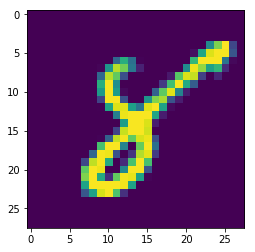

In [74]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(training_epochs):    # 5만개 이미지를 15번 트레이닝 하겠다
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)    # 5만 / 100  => 몇 번 batch 하겠느냐 (500번)
    for i in range(total_batch):    # 500번 (1번에 100개씩 이미지를 읽겠다)
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      cv, _ = sess.run([cost, train], feed_dict={x:batch_xs, y:batch_ys})
      avg_cost += cv / total_batch    # 100 데이터코스트 / 500
      # avg_cost를 왜 저렇게 구하냐,
      # 예: 1, 3, 7, 10, 14의 평균을 구할때 다섯 숫자를 모두 합해서 (35) 개수(5)로 나눠도 되고 (평균 7),
      #     다섯 숫자를 모두 개수로 나눈 후에 (0.2, 0.6, 1.4, 2, 2.8) 다 더해도 된다 (평균 7)
    print("Epoch", "%4d" % (epoch+1), "cost", "{:.9f}".format(avg_cost), "finished")
  print("learning finished")
  print("accuracy : ", sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels}))
  
  r = random.randint(0, mnist.test.num_examples-1)    # 총 mnist.test.num_examples 만큼의 숫자 내에서 랜덤으로 숫자를 하나 뽑기
  print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
  print("Prediction: ", sess.run(tf.argmax(hf, 1), feed_dict={x:mnist.test.images[r:r+1]}))
  plt.imshow(mnist.test.images[r:r+1].reshape(28, 28))
  plt.show()